In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import pydot
from io import StringIO
from sklearn.tree import export_graphviz
#from dm_tools import data_prep
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from PIL import Image 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [75]:
# Preprocessing 
#listing the nominal and numercial values
nominal_cols = ['Auction', 'Make','TopThreeAmericanName','Color', 'Transmission', 'Nationality', 'Size', 'VNST','WheelType']

num_cols = ['VehYear', 'VehBCost','VehOdo','IsOnlineSale', 'WarrantyCost','MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
                        'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
                        'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
                        'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']

In [76]:
## Defining missing values
def fill_missing_values(df):
   
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())
    
    for col in nominal_cols:
        mode = df[col].mode()[0]
        df[col] = df[col].fillna(mode)

    return df

In [77]:
#deleting the unwanted features
def feature_engineering(df):
   
    del df['WheelTypeID'] #Wheeltype ID is used. Wheeltype and WheeltypeID is dervided
    del df['PurchaseID']  
    del df['ForSale']    #Just inclined to yes excluding 6 records
    del df['PurchaseDate'] #We are using Vehicle year  to measure the time series and hence, deleting it. 
    del df['MMRCurrentRetailRatio'] #Derived type
    del df['PRIMEUNIT'] # more than 80% of the values are empty
    del df['AUCGUART'] # more than 80% of the values are empty
    del df['PurchaseTimestamp'] # We are using year as a way of time measure. Hence, Time stamp is not needed.
    
    return df

In [78]:
def data_type_change(df):
    # change Transmission into binary 0/1 variable
    Transmission_map = {"AUTO":0, "MANUAL": 1,'Manual':1}
    df['Transmission'] = df['Transmission'].map(Transmission_map)
    df['Transmission'].fillna(df['Transmission'].mode(),inplace=True)
    
    WheelType_map = {"Alloy":1, "Covers": 2, "Special": 3}
    df['WheelType'] = df['WheelType'].map(WheelType_map)
    
    Auction_map={'ADESA':0,'MANHEIM':1,'OTHER':2}
    df['Auction']=df['Auction'].map(Auction_map)
    
   
    Make_map={'ACURA':0,'BUICK':1,'CADILLAC':3,'CHEVROLET':4,'CHRYSLER':5,'DODGE':6,'FORD':7,'GMC':8,'HONDA':9,'HYUNDAI':10,'INFINITI':11,'ISUZU':12,'JEEP':13,'KIA':14,'LEXUS':15,'LINCOLN':16,'MAZDA':17,'MERCURY':18,'MINI':19,'MITSUBISHI':20,'NISSAN':21,'OLDSMOBILE':22,'PONTIAC':23,'SATURN':24,'SCION':25,'SUBARU':26,'SUZUKI':27,'TOYOTA':2,'VOLKSWAGEN':28,'VOLVO':29}
    df['Make']=df['Make'].map(Make_map)
    #df['Make'].fillna(df['Make'].mode(),inplace=True)
    
    
    american_name_map={'CHRYSLER':0,'FORD':1,'GM':2,'OTHER':3}
    df['TopThreeAmericanName']=df['TopThreeAmericanName'].map(american_name_map)
    
    Color_map={'BEIGE':0,'BLACK':1,'BLUE':2,'BROWN':3,'GOLD':4,'GREEN':5,'GREY':6,'MAROON':7,'NOT AVAIL':8,'ORANGE':9,'OTHER':10,'PURPLE':11,'RED':12,'SILVER':13,'WHITE':14,'YELLOW':15}
    df['Color']=df['Color'].map(Color_map)
    
    Nationality_map={'AMERICAN':0,'OTHER':1,'OTHER ASIAN':2,'TOP LINE ASIAN':3,'USA':4}
    df['Nationality']=df['Nationality'].map(Nationality_map)
    
    Size_map={'COMPACT':0,'CROSSOVER':1,'LARGE':2,'LARGE SUV':3,'LARGE TRUCK':4,'MEDIUM':5,'MEDIUM SUV':6,'SMALL SUV':7,'SMALL TRUCK':8,'SPECIALTY':9,'SPORTS':10,'VAN':11}    
    df['Size']=df['Size'].map(Size_map)
    
    vnst_map = {'TX':0, 'FL':1,'CO':2,'NC':3,'AZ':4,'CA':5,'OK':6,'SC':7,'TN':8,'GA':9,'VA':10,'MO':11,'PA':12,'NV':13,'IN':14,'MS':15,'LA':16,'NJ':17,'NM':18,'KY':19,'AL':20,'IL':21,'UT':22,'WV':23,'WA':24,'OR':25,'NH':26,'NE':27,'OH':28,'ID':29,'NY':30}
    df['VNST'] = df['VNST'].map(vnst_map)
    
    df['Transmission'] = df['Transmission'].astype(float)
    df['Auction'] = df['Auction'].astype(float)
    df['Make'] = df['Make'].astype(float)
    df['TopThreeAmericanName'] = df['TopThreeAmericanName'].astype(float)
    df['Nationality'] = df['Nationality'].astype(float)
    df['Size'] = df['Size'].astype(float)
    df['VNST'] = df['VNST'].astype(float)
    df['VehBCost'] = df['VehBCost'].astype(float)
    df['WheelType'] = df['WheelType'].astype(int)
    df['IsOnlineSale'] = df['IsOnlineSale'].astype(float)
    df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].astype(float)
    df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].astype(float)
    df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].astype(float)
    df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].astype(float)
    df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].astype(float)
    df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].astype(float)
    df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].astype(float)
    df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].astype(float)
    
    
    
    return df

In [79]:
def error_replacing_For_IsOnlineSale(df):
    mask = df['IsOnlineSale'] == -1 
    df.loc[mask, 'IsOnlineSale'] = np.nan
    mask = df['IsOnlineSale'] == 2 
    df.loc[mask, 'IsOnlineSale'] = np.nan
    mask = df['IsOnlineSale'] == 4 
    df.loc[mask, 'IsOnlineSale'] = np.nan
    
    return df

In [80]:
# Converting Nominal into Numerica type
def convert_nominal_cols(df):
    '''
    This function converts nominal cols to one-hot vectors
    '''
    global nominal_cols
    df_with_dummies = pd.get_dummies(df, columns = nominal_cols)
    
    return df_with_dummies


In [81]:
def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_

    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]

    for i in indices:
       print(feature_names[i], ':', importances[i])

def visualize_decision_tree(dm_model, feature_names, save_name):
    import pydot
    from io import StringIO
    from sklearn.tree import export_graphviz
    
    dotfile = StringIO()
    export_graphviz(dm_model, out_file=dotfile, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    graph[0].write_png(save_name) # saved in the following file

In [82]:
def preprocessing():
   
    df = pd.read_csv('CaseStudyData.csv')
    #droping the columns with continuosly 10 null values
    new1_df=df.dropna(axis=0,thresh=10)
    #Rerplacing ? with null values
    new_df = new1_df.replace(['?'], np.nan, inplace=False)
    error_replacing_For_IsOnlineSale(new_df)
    fill_missing_values(new_df)
    feature_engineering(new_df)
    convert_nominal_cols(new_df)
    return new_df

In [83]:
df = pd.read_csv('CaseStudyData.csv')
df = preprocessing()
df2 = data_type_change(df)
df2.to_csv("CaseStudyData1.csv")
print(df2.info())
Y = df2['IsBadBuy']
X = df2.drop(['IsBadBuy'], axis=1)
rs=10
#Split the data based on training and testing with 70 and 30%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=rs)

C:\Users\n10155694\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\n10155694\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41432 entries, 0 to 41475
Data columns (total 23 columns):
Auction                              41432 non-null float64
VehYear                              41432 non-null float64
Make                                 41432 non-null float64
Color                                41432 non-null int64
Transmission                         41432 non-null float64
WheelType                            41432 non-null int32
VehOdo                               41432 non-null float64
Nationality                          41432 non-null float64
Size                                 41432 non-null float64
TopThreeAmericanName                 41432 non-null float64
MMRAcquisitionAuctionAveragePrice    41432 non-null float64
MMRAcquisitionAuctionCleanPrice      41432 non-null float64
MMRAcquisitionRetailAveragePrice     41432 non-null float64
MMRAcquisitonRetailCleanPrice        41432 non-null float64
MMRCurrentAuctionAveragePrice        41432 non-null flo

# Decision tree

In [84]:
# simple decision tree training 
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, Y_train)
#print Y_train.value_counts()
print ("*********************Simple decisoin tree*********************")
print("Train accuracy:", model.score(X_train, Y_train))
print("Test accuracy:", model.score(X_test, Y_test))
print("Number of nodes: ",model.tree_.node_count)
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

*********************Simple decisoin tree*********************
Train accuracy: 1.0
Test accuracy: 0.7851166532582462
Number of nodes:  7373
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     10820
           1       0.21      0.23      0.22      1610

   micro avg       0.79      0.79      0.79     12430
   macro avg       0.55      0.55      0.55     12430
weighted avg       0.80      0.79      0.79     12430



In [54]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_sample(X_train, Y_train)
model.fit(x_res, y_res)
print ("*********************Prediction for test data*********************")
print("Train accuracy:", model.score(x_res, y_res))
print("Test accuracy:", model.score(X_test, Y_test))
print("Number of nodes: ",model.tree_.node_count)
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))

*********************Prediction for test data*********************
Train accuracy: 1.0
Test accuracy: 0.7839098954143202
Number of nodes:  7973
              precision    recall  f1-score   support

           0       0.89      0.86      0.87     10820
           1       0.22      0.26      0.24      1610

   micro avg       0.78      0.78      0.78     12430
   macro avg       0.55      0.56      0.56     12430
weighted avg       0.80      0.78      0.79     12430



In [55]:
# simple decision tree training for undersampled data
cc = ClusterCentroids(random_state=0)
X_under, Y_under = cc.fit_resample(X_train, Y_train)
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_under, Y_under)
print ("*********************Decisoin tree with underfitting of the train data*********************")
print("Train accuracy:", model.score(X_under, Y_under))
print("Test accuracy:", model.score(X_test, Y_test))
print("Number of nodes: ",model.tree_.node_count)
print ("*********************Prediction for test data*********************")
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))

*********************Decisoin tree with underfitting of the train data*********************
Train accuracy: 1.0
Test accuracy: 0.22751407884151248
Number of nodes:  923
*********************Prediction for test data*********************
              precision    recall  f1-score   support

           0       0.89      0.13      0.22     10820
           1       0.13      0.90      0.23      1610

   micro avg       0.23      0.23      0.23     12430
   macro avg       0.51      0.51      0.23     12430
weighted avg       0.79      0.23      0.22     12430



In [85]:
# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

VehOdo : 0.11056465669524385
VehBCost : 0.09854951397431685
MMRAcquisitionRetailAveragePrice : 0.06717483317168223
MMRCurrentAuctionAveragePrice : 0.06599777118371636
MMRCurrentRetailCleanPrice : 0.06481747046982868
MMRCurrentRetailAveragePrice : 0.06375962508640055
MMRCurrentAuctionCleanPrice : 0.06273792032048549
MMRAcquisitionAuctionCleanPrice : 0.06074040953840425
MMRAcquisitionAuctionAveragePrice : 0.05995792303772442
MMRAcquisitonRetailCleanPrice : 0.057301802123321983
WarrantyCost : 0.05462887057347005
VNST : 0.04970756765148726
Color : 0.03982241119130328
Make : 0.034003949634588096
VehYear : 0.031563653053004126
Size : 0.024255040639621427
Auction : 0.01735174792863429
TopThreeAmericanName : 0.012628992607344531
WheelType : 0.011212782317357438
Nationality : 0.006267300967203393


In [86]:
# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("week3_dt_viz.png") 


KeyboardInterrupt: 

In [70]:
#retrain with a small max_depth limit

model = DecisionTreeClassifier(max_depth=3, random_state=rs)
model.fit(x_res, y_res)

print("Train accuracy:", model.score(x_res, y_res))
print("Test accuracy:", model.score(X_test, Y_test))

y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))

Train accuracy: 0.7325820889610647
Test accuracy: 0.7746580852775543
              precision    recall  f1-score   support

           0       0.88      0.85      0.87     10820
           1       0.20      0.25      0.22      1610

   micro avg       0.77      0.77      0.77     12430
   macro avg       0.54      0.55      0.54     12430
weighted avg       0.80      0.77      0.78     12430



In [106]:

# grab feature importance from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

# visualize
print("Number of nodes: ",model.tree_.node_count)
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("week3_dt_viz.png") # saved in the following file

VehOdo : 0.11056465669524385
VehBCost : 0.09854951397431685
MMRAcquisitionRetailAveragePrice : 0.06717483317168223
MMRCurrentAuctionAveragePrice : 0.06599777118371636
MMRCurrentRetailCleanPrice : 0.06481747046982868
MMRCurrentRetailAveragePrice : 0.06375962508640055
MMRCurrentAuctionCleanPrice : 0.06273792032048549
MMRAcquisitionAuctionCleanPrice : 0.06074040953840425
MMRAcquisitionAuctionAveragePrice : 0.05995792303772442
MMRAcquisitonRetailCleanPrice : 0.057301802123321983
WarrantyCost : 0.05462887057347005
VNST : 0.04970756765148726
Color : 0.03982241119130328
Make : 0.034003949634588096
VehYear : 0.031563653053004126
Size : 0.024255040639621427
Auction : 0.01735174792863429
TopThreeAmericanName : 0.012628992607344531
WheelType : 0.011212782317357438
Nationality : 0.006267300967203393
Number of nodes:  7373


# Visualising relationship between hyperparameters and model performance

In [72]:
test_score = []
train_score = []

# check the model performance for max depth from 2-20
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
    model.fit(x_res, y_res)
    test_score.append(model.score(X_test, Y_test))
    train_score.append(model.score(x_res, y_res))

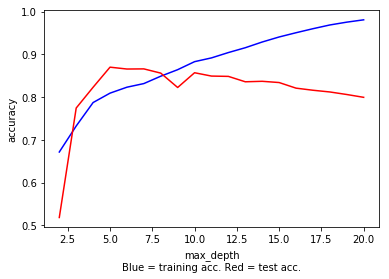

In [87]:
# plot max depth hyperparameter values vs training and test accuracy score
print("Number of nodes: ",model.tree_.node_count)
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

# Finding optimal hyperparameters with GridSearchCV

In [111]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 8),
          'min_samples_leaf': range(5, 20, 5)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(x_res, y_res)

print("Train accuracy:", cv.score(x_res, y_res))
print("Test accuracy:", cv.score(X_test, Y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(Y_test, Y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.8312670812373747
Test accuracy: 0.8662107803700724
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     10820
           1       0.21      0.23      0.22      1610

   micro avg       0.79      0.79      0.79     12430
   macro avg       0.55      0.55      0.55     12430
weighted avg       0.80      0.79      0.79     12430

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 15}


In [112]:

# grid search CV #2
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(5, 9),
          'min_samples_leaf': range(14,18,1)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(x_res, y_res)

print("Train accuracy:", cv.score(x_res, y_res))
print("Test accuracy:", cv.score(X_test, Y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(Y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.8482988077791421
Test accuracy: 0.8552695092518101
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     10820
           1       0.28      0.07      0.12      1610

   micro avg       0.86      0.86      0.86     12430
   macro avg       0.58      0.52      0.52     12430
weighted avg       0.80      0.86      0.82     12430

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 16}


In [113]:
# inside `dm_tools.py' together with data_prep()
import numpy as np
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]

    for i in indices:
        print(feature_names[i], ':', importances[i])

def visualize_decision_tree(dm_model, feature_names, save_name):
    dotfile = StringIO()
    export_graphviz(dm_model, out_file=dotfile, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    graph[0].write_png(save_name) # saved in the following file
    
    
analyse_feature_importance(cv.best_estimator_, X.columns, 20)
visualize_decision_tree(cv.best_estimator_, X.columns, "optimal_tree.png")
img = Image.open('optimal_tree.png')
new_width  = 70000
new_height =6000
img = img.resize((new_width, new_height), Image.ANTIALIAS)
img.save('optimal_tree.png')
img.show() 


WheelType : 0.4401487891964672
Auction : 0.2856146408430723
VehYear : 0.1554033971095392
Make : 0.0467333734446875
TopThreeAmericanName : 0.03358150634410972
VehOdo : 0.008079771085258326
MMRAcquisitionRetailAveragePrice : 0.0057247893366380405
Nationality : 0.0045502836291589095
VehBCost : 0.004141455652212974
MMRCurrentRetailCleanPrice : 0.0037665021180968276
MMRAcquisitionAuctionAveragePrice : 0.003624559912087576
Size : 0.0027381719736960662
WarrantyCost : 0.0019031962161049798
MMRCurrentRetailAveragePrice : 0.0013957899885854257
MMRCurrentAuctionCleanPrice : 0.0006886141750881684
VNST : 0.0005590411983132328
IsOnlineSale : 0.0005521440617810528
MMRAcquisitonRetailCleanPrice : 0.0003444566051496012
MMRAcquisitionAuctionCleanPrice : 0.000262388259797604
Color : 0.00016084776296994687
